In [29]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
# Pregunta 1: Extracción de datos de acciones de Tesla
tesla = yf.Ticker("TSLA")
datos_tesla = tesla.history(period="5y")
print("Datos de acciones de Tesla:")
print(datos_tesla.head())

Datos de acciones de Tesla:
                                Open       High        Low      Close  \
Date                                                                    
2020-03-02 00:00:00-05:00  47.417332  49.579334  45.778000  49.574669   
2020-03-03 00:00:00-05:00  53.666668  53.798668  47.740665  49.700668   
2020-03-04 00:00:00-05:00  50.930668  51.101334  48.315334  49.966667   
2020-03-05 00:00:00-05:00  48.251331  49.716667  47.871334  48.302666   
2020-03-06 00:00:00-05:00  46.000000  47.133331  45.618000  46.898666   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-03-02 00:00:00-05:00  302925000        0.0           0.0  
2020-03-03 00:00:00-05:00  386760000        0.0           0.0  
2020-03-04 00:00:00-05:00  225735000        0.0           0.0  
2020-03-05 00:00:00-05:00  162790500        0.0           0.0  
2020-03-06 00:00:00-05:00  189943500        0.0           0.0  


In [15]:
# URL de la página para obtener los ingresos de Tesla
url_tesla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}
response = requests.get(url_tesla, headers=headers)
if response.status_code == 200:

    soup = BeautifulSoup(response.content, "html.parser")
    tablas = soup.find_all("table")
    if len(tablas) > 1:
        df_tesla = pd.read_html(str(tablas[1]))[0]
        df_tesla.columns = ["Fecha", "Ingresos"]
        df_tesla = df_tesla.dropna()
        df_tesla["Ingresos"] = df_tesla["Ingresos"].str.replace("$", "").str.replace(",", "").astype(float)
        print("\nDatos de ingresos de Tesla:")
        print(df_tesla.head())



Datos de ingresos de Tesla:
        Fecha  Ingresos
0  2024-12-31   25707.0
1  2024-09-30   25182.0
2  2024-06-30   25500.0
3  2024-03-31   21301.0
4  2023-12-31   25167.0


C:\Users\CRISTIAN\AppData\Local\Temp\ipykernel_10936\1121818446.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_tesla = pd.read_html(str(tablas[1]))[0]


In [16]:
# Pregunta 3: Extracción de datos de acciones de GameStop
gamestop = yf.Ticker("GME")
datos_gamestop = gamestop.history(period="5y")
print("Datos de acciones de GameStop:")
print(datos_gamestop.head())

Datos de acciones de GameStop:
                             Open    High     Low   Close    Volume  \
Date                                                                  
2020-03-02 00:00:00-05:00  0.9000  0.9625  0.8475  0.9575  12833600   
2020-03-03 00:00:00-05:00  0.9700  0.9725  0.8750  0.9075  17130000   
2020-03-04 00:00:00-05:00  0.9275  0.9575  0.8650  0.9425  17030400   
2020-03-05 00:00:00-05:00  0.9250  0.9975  0.8975  0.9900  14397600   
2020-03-06 00:00:00-05:00  0.9600  1.0175  0.9400  0.9800   8387200   

                           Dividends  Stock Splits  
Date                                                
2020-03-02 00:00:00-05:00        0.0           0.0  
2020-03-03 00:00:00-05:00        0.0           0.0  
2020-03-04 00:00:00-05:00        0.0           0.0  
2020-03-05 00:00:00-05:00        0.0           0.0  
2020-03-06 00:00:00-05:00        0.0           0.0  


In [37]:
#Ejercicio 4

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"
}

html_data = requests.get(url, headers=headers).text
soup = BeautifulSoup(html_data, 'html.parser')

gme_revenue = pd.read_html(html_data, match="GameStop Quarterly Revenue")[0]
gme_revenue = gme_revenue.rename(columns={"GameStop Quarterly Revenue (Millions of US $)": "Date",
                                          "GameStop Quarterly Revenue (Millions of US $).1": "Revenue"})

gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",|\$", "", regex=True)
gme_revenue.dropna(inplace=True)

print(gme_revenue.head())


         Date Revenue
0  2024-10-31     860
1  2024-07-31     798
2  2024-04-30     882
3  2024-01-31    1794
4  2023-10-31    1078


C:\Users\CRISTIAN\AppData\Local\Temp\ipykernel_10936\3234051247.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(html_data, match="GameStop Quarterly Revenue")[0]


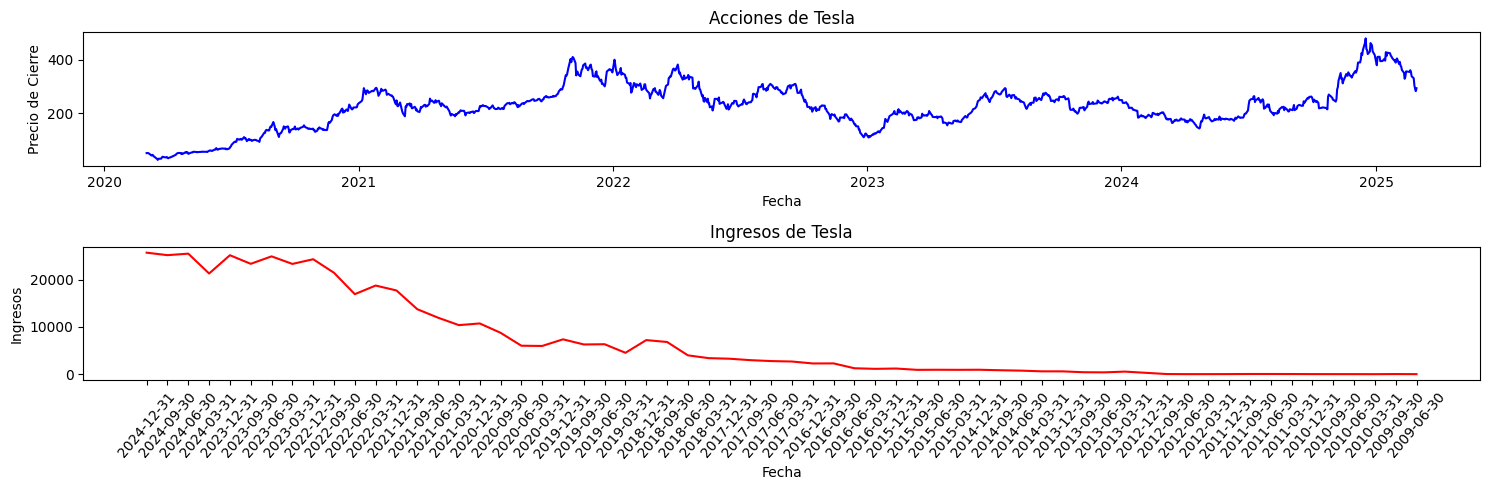

In [ ]:
#Ejercicio 5
fig, ax = plt.subplots(2, 1, figsize=(15, 5))
sns.lineplot(data=datos_tesla, x=datos_tesla.index, y="Close", ax=ax[0], color="blue")
ax[0].set_title("Acciones de Tesla")
ax[0].set_xlabel("Fecha")
ax[0].set_ylabel("Precio de Cierre")
sns.lineplot(data=df_tesla_ingresos, x="Fecha", y="Ingresos", ax=ax[1], color="red")
ax[1].set_title("Ingresos de Tesla")
ax[1].set_xlabel("Fecha")
ax[1].tick_params(axis='x', rotation=50) 
ax[1].set_ylabel("Ingresos")
plt.tight_layout()
plt.show()


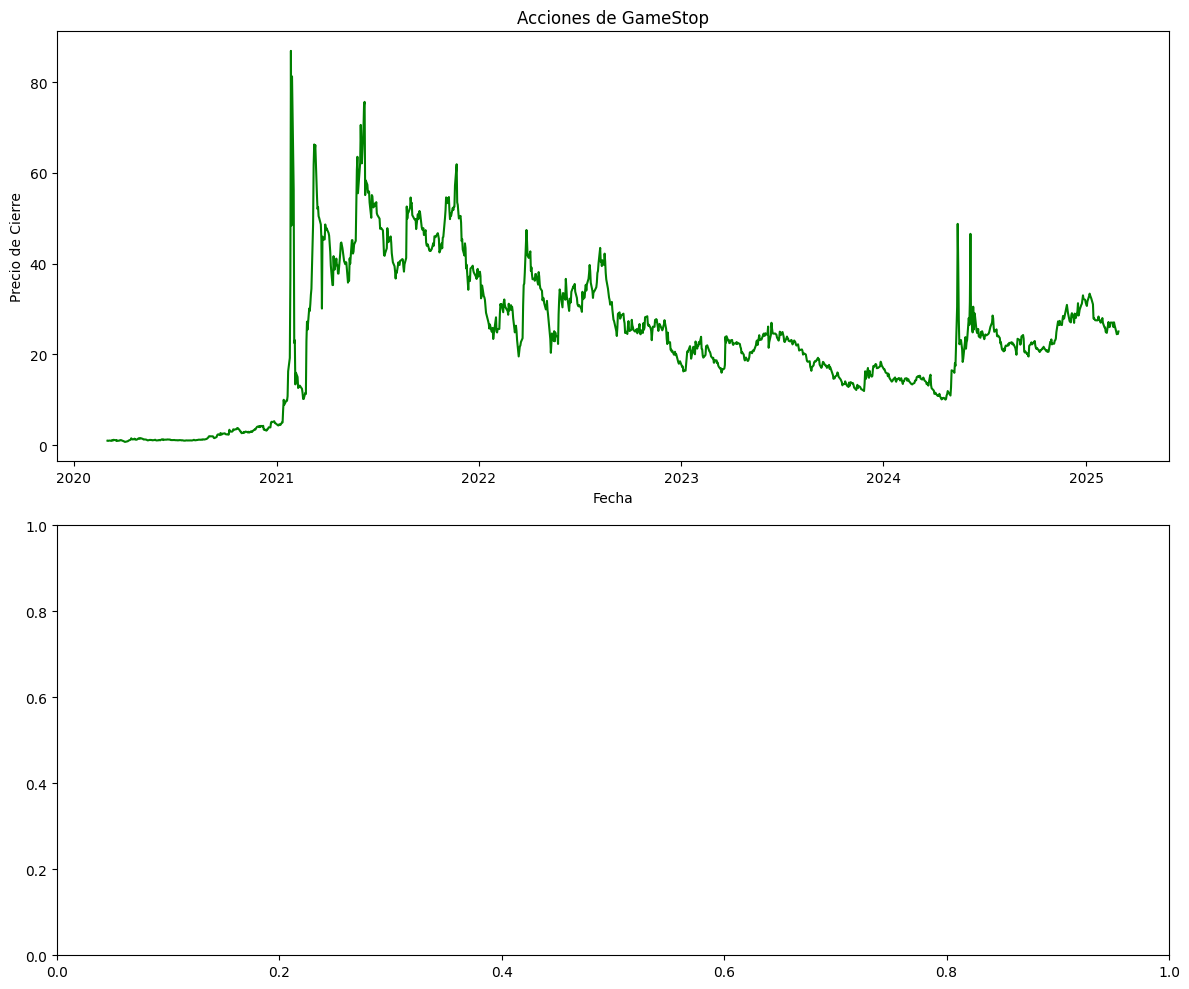

In [54]:
# Pregunta 6: Cuadro de mando de acciones e ingresos de GameStop
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
sns.lineplot(data=datos_gamestop, x=datos_gamestop.index, y="Close", ax=ax[0], color="green")
ax[0].set_title("Acciones de GameStop")
ax[0].set_xlabel("Fecha")
ax[0].set_ylabel("Precio de Cierre")
plt.tight_layout()
plt.show()
